# Chap5 LogisticRegression

## 1.概述

### 1.1 Logistic回归

$$z =\left[\theta_0,\theta_1,...,\theta_n\right]*[x_0,...,x_n]^{T}= \theta^{T}x$$
估计$\theta_0,...,\theta_n$,引入sigmoid函数,将回归方程$z变换到g(z)$
$$g(z) = \frac{1}{1+e^{-z}}$$

**面试高危问题：Sigmoid函数的公式和性质**

Sigmoid函数是一个S型的函数，当自变量z趋近正无穷时，因变量g(z)趋近于1，而当z趋近负无穷时，g(z)趋近于0，它能够将任何实数映射到(0,1)区间，使其可用于将任意值函数转换为更适合二分类的函数。

因为这个性质，Sigmoid函数也被当作是归一化的一种方法，与我们之前学过的MinMaxSclaer同理，是属于数据预处理中的“缩放”功能，可以将数据压缩到[0,1]之内。区别在于，MinMaxScaler归一化之后，是可以取到0和1的（最大值归一化后就是1，最小值归一化后就是0），但Sigmoid函数只是无限趋近于0和1。

- 二元逻辑回归的一般形式
$$g(z)=y(x)=\frac{1}{1+e^{-\theta^{T}x}}$$

## 1.1sklearn中逻辑回归
|逻辑回归相关的类 |说明|
|  ----  | ----  |
linear_model.LogisticRegression |逻辑回归分类器（又叫logit回归，最大熵分类器）
linear_model.LogisticRegressionCV| 带交叉验证的逻辑回归分类器
linear_model.logistic_regression_path | 计算Logistic回归模型以获得正则化参数的列表
linear_model.SGDClassifier | 利用梯度下降求解的线性分类器（SVM，逻辑回归等等）
linear_model.SGDRegressor | 利用梯度下降最小化正则化后的损失函数的线性回归模型
metrics.log_loss | 对数损失，又称逻辑损失或交叉熵损失
|**其他会涉及的类** | 说明|
|metrics.confusion_matrix |混淆矩阵，模型评估指标|
|metrics.roc_auc_score |ROC曲线，模型评估指标|
|metrics.accuracy_score |精确性，模型评估指标|



## 2.linear_model.LogisticRegression
```
class sklearn.linear_model.LogisticRegression (penalty=’l2’, dual=False, tol=0.0001, C=1.0,fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, max_iter=100,multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None)
```
### 2.1 二元逻辑回归的损失函数

#### 2.1.1 损失函数

我们使用”损失函数“这个评估指标，来衡量参数为的模型拟合训练集时产生的信息损失的大小，并以此衡量参数的优劣。即是说，我们在求解参数 时，追求损失函数最小，让模型在训练数据上的拟合效果最优，即预测准确率尽量靠近100%。我们追求，能够让**损失函数最小化的参数组合**
$$J(\theta)=-\sum{y_i*\log{(y_\theta(x_i))}+(1-y_i)*\log{(1-y_\theta(x_i))}}$$

- 注意：没有”求解参数“需求的模型没有损失函数，比如KNN，决策树 大部分机器学习算法都没有损失函数



### 2.2 重要参数penalty & C

- penalty 选择正则化方法
- C 控制惩罚项 
  - C越小 惩罚越大
- 重要属性`.coef_` 查看每个特征对应的参数

#### 2.2.1 正则化

利用正则化防止模型过拟合，常用的有L1正则化和L2正则化两种选项，分别通过在**损失函数后加上参数向量的L1范式和L2范式的倍数**来实现。
- L1范式表现为参数向量中的每个参数的绝对值之和
- L2范数表现为参数向量中的每个参数的平方和的开方值
- 截距不参加正则化

|参数|说明|
|---|---|
|**penalty**|"l1"或"l2"来指定正则化方式，默认"l2"。注意，若选择"l1"正则化，参数solver仅能够使用求解方式”liblinear"和"saga“，若使用“l2”正则化，参数solver中所有的求解方式都可以使用。|
|**C**|C正则化强度的倒数，必须是一个大于0的浮点数，默认1.0，即默认正则项与损失函数的比值是1：1。C越小，损失函数会越小，模型对损失函数的惩罚越重，正则化的效力越强，参数会逐渐被压缩得越来越小。|

L1正则化和L2正则化虽然都可以控制过拟合，但它们的效果并不相同。当正则化强度逐渐增大（即C逐渐变小），参数的取值会逐渐变小，但**L1正则化会将参数压缩为0，L2正则化只会让参数尽量小，不会取到0。**

在L1正则化在逐渐加强的过程中，携带信息量小的、对模型贡献不大的特征的参数，会比携带大量信息的、对模型有巨大贡献的特征的参数更快地变成0，所以L1正则化本质是一个特征选择的过程，掌管了参数的“稀疏性”。L1正则化越强，参数向量中就越多的参数为0，参数就越稀疏，选出来的特征就越少，以此来防止过拟合。因此，**如果特征量很大，数据维度很高，我们会倾向于使用L1正则化**。由于L1正则化的这个性质，逻辑回归的特征选择可以由Embedded嵌入法来完成。

- L1控制稀疏性，如果只是想要防止过拟合L2
- C的取值可以使用学习曲线

In [2]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer   # 导入乳腺癌数据集

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [4]:
data = load_breast_cancer()
X = data.data
y = data.target
data.data.shape

# 30个特征 569个数据

(569, 30)

In [7]:
lrl1 = LR(penalty="l1",solver="liblinear",C=0.5,max_iter=1000)
lrl2 = LR(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)


In [8]:
#逻辑回归的重要属性coef_，查看每个特征所对应的参数
lrl1 = lrl1.fit(X,y)


In [10]:
lrl1.coef_


array([[ 4.00362557,  0.03192769, -0.13750298, -0.01623259,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50552227,  0.        , -0.0712734 ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24587754, -0.12866395, -0.01439917,  0.        ,
         0.        , -2.03685589,  0.        ,  0.        ,  0.        ]])

In [11]:
(lrl1.coef_ != 0).sum(axis=1)
# 筛选出不为零的特征 10个

array([10])

In [13]:
lrl2 = lrl2.fit(X,y)
lrl2.coef_

array([[ 1.61358623e+00,  1.00284781e-01,  4.61036191e-02,
        -4.21333984e-03, -9.27388895e-02, -3.00561176e-01,
        -4.53477303e-01, -2.19973055e-01, -1.33257382e-01,
        -1.92654788e-02,  1.87887747e-02,  8.75532438e-01,
         1.31708341e-01, -9.53440922e-02, -9.64408195e-03,
        -2.52457845e-02, -5.83085040e-02, -2.67948347e-02,
        -2.74103894e-02, -6.09326731e-05,  1.28405755e+00,
        -3.00219699e-01, -1.74217870e-01, -2.23449384e-02,
        -1.70489339e-01, -8.77400140e-01, -1.15869741e+00,
        -4.22909464e-01, -4.12968162e-01, -8.66604813e-02]])

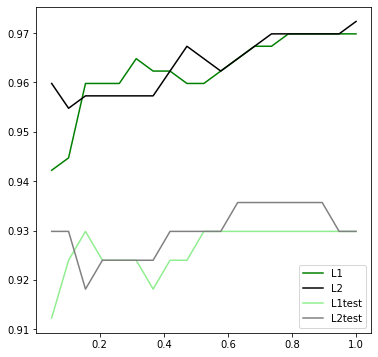

In [16]:
l1 = []
l2 = []
l1test = []
l2test = []

# 划分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

# 绘制C的学习曲线
for i in np.linspace(0.05,1,19):
    lrl1 = LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl2 = LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)
    
    # L1正则化
    lrl1 = lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))   # accuracy_score两个参数预测值和真实值
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest))
    # L2正则化
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))


graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"]
plt.figure(figsize=(6,6))

# 循环绘制4个学习曲线
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])   # plot(x,y,颜色,标签)
plt.legend(loc=4) #图例的位置在哪里? 4表示，右下角  0 表示最佳位置  
plt.show()

- 训练的结果明显比测试的结果好很多
- C越来越大时,训练集上的效果越来越好，但是在测试集上效果就不变化了---> 过拟合
  
考虑C的取值在0.8-0.9

#### 2.2.2 特征工程

- 业务选择
- PCA & 一般不使用
  - 影响特征的可解释性 降维以后 不知道特征的可解释性
- 统计方法(可以但是没必要)
  - 过滤法：方差 卡方 互信息 
- 高效的嵌入法embedded
  
  由于L1正则化会使得部分特征对应的参数为0，因此L1正则化可以用来做特征选择，结合嵌入法的模块SelectFromModel，我们可以很容易就筛选出让模型十分高效的特征。注意，此时我们的目的是，尽量保留原数据上的信息，让模型在降维后的数据上的拟合效果保持优秀，因此我们不考虑训练集测试集的问题，把所有的数据都放入模型进行降维

  **调整模型的拟合效果**

- `threshold`嵌入法的阈值，
  表示删除所有参数的绝对值低于这个阈值的特征,默认为None
- 调逻辑回归的类LR_
  - 例子：调整逻辑回归模型中参数C的取值

In [20]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

# 不降维进行进行线性回归
LR_ = LR(solver="liblinear",C=0.9,random_state=420)
cross_val_score(LR_,data.data,data.target,cv=10).mean()


0.9490601503759398

In [21]:
# 模型降维
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)   # 嵌入法的实例化
X_embedded.shape

# 特征有30个降维到9个

(569, 9)

In [19]:
cross_val_score(LR_,X_embedded,data.target,cv=10).mean()

# 特征数量下降了但是模型效果的下降了

0.9368107769423559

(0.0, 30)
(0.10699266486102965, 17)
(0.2139853297220593, 12)
(0.32097799458308895, 11)
(0.4279706594441186, 8)
(0.5349633243051483, 8)
(0.6419559891661779, 6)
(0.7489486540272076, 5)
(0.8559413188882372, 5)
(0.9629339837492669, 5)
(1.0699266486102965, 5)
(1.176919313471326, 4)
(1.2839119783323558, 2)
(1.3909046431933856, 2)
(1.4978973080544151, 2)
(1.6048899729154447, 1)
(1.7118826377764744, 1)
(1.8188753026375042, 1)
(1.9258679674985337, 1)
(2.0328606323595633, 1)


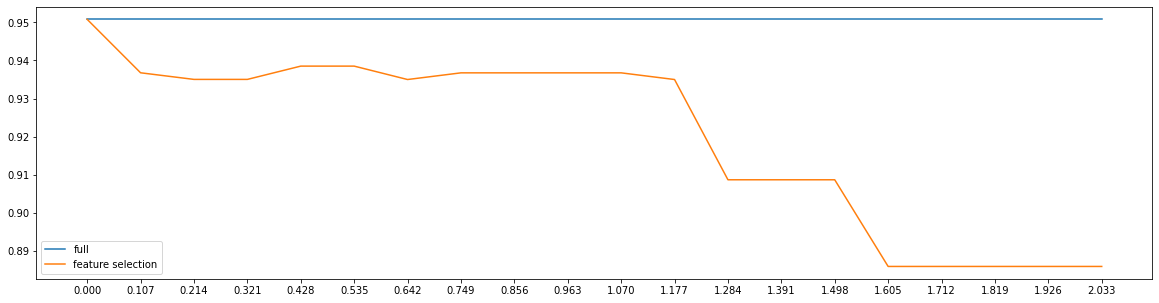

In [22]:
#————————————————调整threshold————————————————
fullx = []   
fsx = []

threshold = np.linspace(0,abs((LR_.fit(data.data,data.target).coef_)).max(),20)
# 从0到系数的最大值中均匀的选择20个数来绘制threshold的学习曲线

k=0

for i in threshold:
    X_embedded = SelectFromModel(LR_,threshold=i).fit_transform(data.data,data.target)
     # 特征选择前的交叉验证的结果
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=5).mean())  

    # 特征选择后的交叉验证
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=5).mean())   

    print((threshold[k],X_embedded.shape[1]))  # 利用k进行索引
    k+=1

plt.figure(figsize=(20,5))
plt.plot(threshold,fullx,label="full")
plt.plot(threshold,fsx,label="feature selection")
plt.xticks(threshold)
plt.legend()
plt.show()

# 随着threshold的变大 模型的效果住家下贱
# threshold选择0.1时 模型的特征就只剩下了17个

0.9561090225563911 6.01


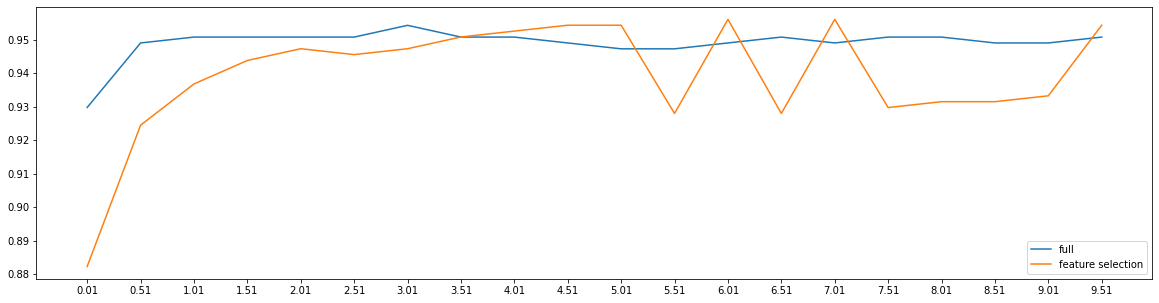

In [25]:
#————————————————调整回归的类————————————————
# 即调整逻辑回归中的参数C
fullx = []
fsx = []

C=np.arange(0.01,10.01,0.5)

for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())

    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())

print(max(fsx),C[fsx.index(max(fsx))])

plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

# 出现了特征选择以后的 模型的拟合效果更好

0.9561090225563911 6.079999999999999


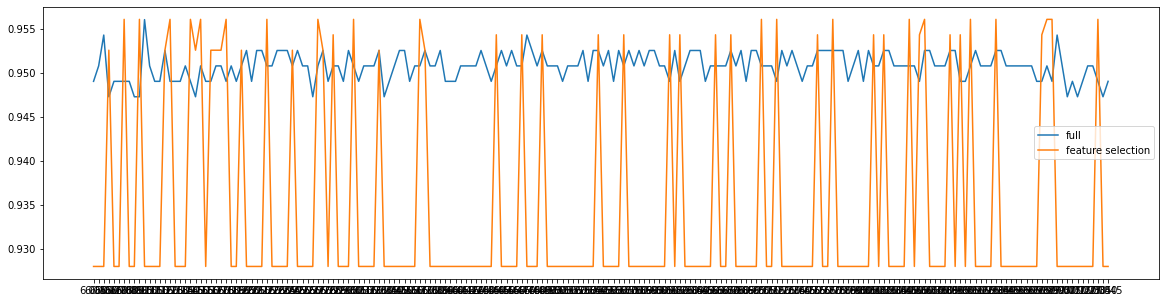

(569, 10)

In [26]:
#————————————细化学习曲线————————————————
# 代码同上 只是C的取值更加细化
fullx = []
fsx = []

C=np.arange(6.05,7.05,0.005)

for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())

    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())

print(max(fsx),C[fsx.index(max(fsx))])

plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

#验证模型效果：降维之前
LR_ = LR(solver="liblinear",C=6.069999999999999,random_state=420)
cross_val_score(LR_,data.data,data.target,cv=10).mean()

#验证模型效果：降维之后
LR_ = LR(solver="liblinear",C=6.069999999999999,random_state=420)
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
cross_val_score(LR_,X_embedded,data.target,cv=10).mean()

X_embedded.shape

# 30个特征降维到10个 模型的效果有小小的提升

### 2.3 梯度下降：重要参数max_iter

逻辑回归的数学目的是求解能够让模型最优化，拟合程度最好的参数的值，即**求解能够让损失函数最小化的值**。对于二元逻辑回归来说，有多种方法可以用来求解参数 ，最常见的有梯度下降法(Gradient Descent)，坐标下降法(Coordinate Descent)，牛顿法(Newton-Raphson method)等。

#### 2.3.1 参数`max_iter`
- 代表着能走的最大步数，即最大迭代次数
  
#### 2.3.2 梯度
- 在多元函数上对各个**自变量**求∂偏导数，把求得的各个自变量的偏导数以向量的形式写出来
  - 不是对参数求偏导的结果
  - 对于逻辑回归来说 多元函数就是损失函数，自变量就参数$\theta$
 
    求解梯度，是在损失函数上对损失函数$J(\theta_1,\theta_2)$自身的自变量$\theta_1,\theta_2$和求偏导，而这两个自变量，刚好是逻辑回归的预测函数$y(x)=\frac{1}{1+e^{-\theta^T*x}}$的参数

- 梯度是一个向量，因此它有大小也有方向。
  - 它的大小，就是偏导数组成的向量的大小，又叫做向量的模。
  - 它的方向，几何上来说，就是损失函数的值增加最快的方向.只要沿着梯度向量的反方向移动坐标，损失函数的取值就会减少得最快，也就最容易找到损失函数的最小值

**遍历$\theta$的过程**

$$\theta_j+1=\theta_j-\alpha*d_j=\theta_j-\alpha*\sum{(y_\theta(x_i)-y_i)*x_i}$$
- $\alpha$被称为步长，控制着每走一步（每迭代一次）后 的变化，并以此来影响每次迭代后的梯度向量的大小和方向。

#### 2.3.3 步长   

步长不是任何物理距离，它甚至不是梯度下降过程中任何距离的直接变化，它是梯度向量的大小上的一个比例，影响着参数向量 每次迭代后改变的部分。

设置参数max_iter最大迭代次数来代替步长，帮助我们控制模型的迭代速度并适时地让模型停下。max_iter越大，代表步长越小，模型迭代时间越长，反之，则代表步长设置很大，模型迭代时间很短

- 属性`.n_iter_` 来调用本次求解中真正实现的迭代次数
  - 在最大步长之间，模型没有收敛的话就会报错
  - 如果收敛就会返回实际迭代的次数


In [3]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer   # 导入乳腺癌数据集
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target
data.data.shape

(569, 30)

In [4]:

l2 = []
l2test = []
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)


c:\Users\HP\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\HP\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\HP\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


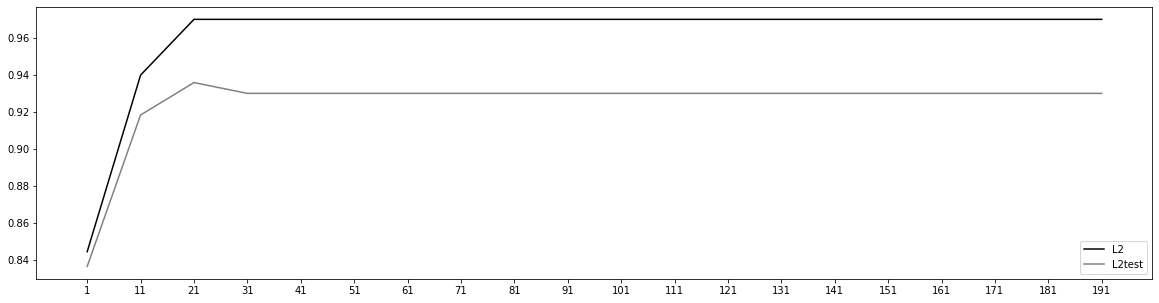

array([25], dtype=int32)

In [5]:
# 查看最大迭代次数
for i in np.arange(1,201,10):
    lrl2 = LR(penalty="l2",solver="liblinear",C=0.9,max_iter=i)  # 实例化
    lrl2 = lrl2.fit(Xtrain,Ytrain)                               # 训练集上训练
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))       # 训练集上的结果
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))     # 测试集上的结果

graph = [l2,l2test]
color = ["black","gray"]
label = ["L2","L2test"]

plt.figure(figsize=(20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.xticks(np.arange(1,201,10))
plt.show()



In [6]:
#我们可以使用属性.n_iter_来调用本次求解中真正实现的迭代次数
lr = LR(penalty="l2",solver="liblinear",C=0.9,max_iter=300).fit(Xtrain,Ytrain)
lr.n_iter_

# 模型的迭代次数为25 达到模型效果的最大值

array([25], dtype=int32)

### 2.4 二元回归与多元回归：重要参数solver & multi_class

之前我们对逻辑回归的讨论，都是针对二分类的逻辑回归展开，其实sklearn提供了多种可以使用逻辑回归处理多分类问题的选项。比如说，我们可以把某种分类类型都看作1，其余的分类类型都为0值，和”数据预处理“中的二值化的思维类似，这种方法被称为"一对多"(One-vs-rest)，简称OvR，在sklearn中表示为“ovr"。

又或者，我们可以把好几个分类类型划为1，剩下的几个分类类型划为0值，这是一种”多对多“(Many-vs-Many)的方法，简称MvM，在sklearn中表示为"Multinominal"。每种方式都配合L1或L2正则项来使用。在sklearn中，我们使用参数`multi_class`来告诉模型，我们的预测标签是什么样的类型。

**multi_class**
- `ovr`:表示分类问题是二分类，或让模型使用"一对多"的形式来处理多分类问题，默认就是ovr
- `multinomial`：表示处理多分类问题，这种输入在参数solver是'liblinear'时不可用。
- `auto`：表示会根据数据的分类情况和其他参数来确定模型要处理的分类问题的类型。比如说，如果数据是二分类，或者solver的取值为"liblinear"，"auto"会默认选择"ovr"。反之，则会选择"Multinomial"。

**solver**：控制求解器
- `liblinear`是二分类专用，也是现在的默认求解器。
- `lbfgs` 拟牛顿法，利用损失函数的二阶导数优化 
- `newton-cg` 牛顿法的一种，利用损失函数的二阶导数优化 前三种均在大型数据集上计算较慢
- `sag` 随机梯度下降 每次只利用一部分样本来计算梯度
- `saga` 上述方法的进化 系数多项逻辑回归的首选

In [7]:
#————————————————鸢尾花数据集上，multinomial和ovr的区别————————————————
from sklearn.datasets import load_iris
iris = load_iris()

In [10]:
for multi_class in ('multinomial','ovr'):
    lr = LR(solver='sag',max_iter=100,random_state=42,multi_class=multi_class).fit(iris.data,iris.target)
    print("training score : %.3f (%s)" % (lr.score(iris.data, iris.target),multi_class))   

# multinomial上的效果更好 

training score : 0.987 (multinomial)
training score : 0.960 (ovr)


c:\Users\HP\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### 2.5 样本不平衡与参数class_weight

- 这个参数变换莫测 --> 很难用

样本不平衡是指在一组数据集中，标签的一类天生占有很大的比例，或误分类的代价很高，即我们想要捕捉出某种特定的分类的时候的状况。

因此我们要使用参数class_weight对**样本标签进行一定的均衡**，给少量的标签更多的权重，让模型更偏向少数类，向捕获少数类的方向建模。该参数默认None，此模式表示自动给与数据集中的所有标签相同的权重，即自动1：1。当误分类的代价很高的时候，我们使用”balanced“模式，我们只是希望对标签进行均衡的时候，什么都不填就可以解决样本不均衡问题。

主流解决样本不平衡的是采样法:

    是通过重复样本的方式来平衡标签，可以进行上采样（增加少数类的样本），比如SMOTE，或者下采样（减少多数类的样本）。对于逻辑回归来说，上采样是最好的办法。

## 3.案例：用逻辑回归制作评分卡

评分卡打出的分数越高，客户的信用越好，风险越小。


- 模型开发的流程
  - 获取数据
  - 数据清洗 特征工程
  - 模型开发
  - 模型验证与评估   
    - 效果不好就继续获取数据 调整模型
  - 模型上线
  - 监测与报告  
    - 周期性获取新数据 调整模型

## 3.1 导库 获取数据

In [136]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR


In [137]:
data = pd.read_csv('./DATASETS/chap5/rankingcard.csv',index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


#### 3.2 探索数据与数据预处理

SeriousDlqin2yrs 是因变量y

In [138]:
data.shape

(150000, 11)

In [139]:
data.info()

# 10个特征 第一个是序列
# 月收入和家庭成员数 都有缺失

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

#### 3.2.1 去除重复值

- drop_duplicates()
- 删除重复值以后 索引不变化 --> 删除行以后 一定要记得恢复索引

In [140]:
data.drop_duplicates(inplace=True)
data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [141]:
# 删除行以后 一定要记得恢复索引
data.index = range(data.shape[0])
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

#### 3.2.2 填补缺失值

- .fillna(num,inplace=True)


In [142]:
data.isnull().sum()/data.shape[0]  # 缺失值的比例

# 月收入中20%的数据均缺失了不能进行删除
# 家庭成员数的缺失较少 可以直接删除

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [143]:
#————————————填补月收入——————————
data['NumberOfDependents'].fillna(data['NumberOfDependents'].mean(),inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

In [144]:
#——————————————————利用随机森林填补月收入——————————————————
# 收入缺失很有可能是收入不稳定 或者低收入人群

def fill_missing_rf(X,y,to_fill):
    """
    用随机生理填补缺失值的函数

    参数：
    X:要填补的特征矩阵
    y:完整的,没有缺失值的标签
    to_fill:字符串,要填补的那一列的名称

    """
    #构建我们的新特征矩阵和新标签
    df = X.copy()
    fill = df.loc[:,to_fill]
    df = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)],axis=1)

    #找出我们的训练集和测试集
    Ytrain = fill[fill.notnull()]
    Ytest = fill[fill.isnull()]
    Xtrain = df.iloc[Ytrain.index,:]
    Xtest = df.iloc[Ytest.index,:]

    #用随机森林回归来填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100)
    rfr = rfr.fit(Xtrain, Ytrain)
    Ypredict = rfr.predict(Xtest)
    
    return Ypredict

In [145]:
X= data.iloc[:,1:]
y = data["SeriousDlqin2yrs"]
X.shape

#=====【TIME WARNING：1 min】=====#
y_pred = fill_missing_rf(X,y,"MonthlyIncome")

#确认我们的结果合理之后，我们就可以将数据覆盖了
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] = y_pred

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         149391 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

#### 3.2.3 描述性统计处理异常值

- 3sigma 法则

In [147]:
#描述性统计
data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T


,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5427.864593,13254.776559,0.0,0.0,0.180000,1800.000000,4428.000000,7416.000000,10800.000000,23205.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [148]:
#异常值也被我们观察到，年龄的最小值居然有0，这不符合银行的业务需求，即便是儿童账户也要至少8岁，我们可以
#查看一下年龄为0的人有多少
(data["age"] == 0).sum()


1

In [149]:
#发现只有一个人年龄为0，可以判断这肯定是录入失误造成的，可以当成是缺失值来处理，直接删除掉这个样本
data = data[data["age"] != 0]


In [150]:

"""
另外，有三个指标看起来很奇怪：
"NumberOfTime30-59DaysPastDueNotWorse"
"NumberOfTime60-89DaysPastDueNotWorse"
"NumberOfTimes90DaysLate"
这三个指标分别是“过去两年内出现35-59天逾期但是没有发展的更坏的次数”，“过去两年内出现60-89天逾期但是没
有发展的更坏的次数”,“过去两年内出现90天逾期的次数”。这三个指标，在99%的分布的时候依然是2，最大值却是
98，看起来非常奇怪。一个人在过去两年内逾期35~59天98次，一年6个60天，两年内逾期98次这是怎么算出来的？
我们可以去咨询业务人员，请教他们这个逾期次数是如何计算的。如果这个指标是正常的，那这些两年内逾期了98次的
客户，应该都是坏客户。在我们无法询问他们情况下，我们查看一下有多少个样本存在这种异常：
"""

data[data.loc[:,"NumberOfTimes90DaysLate"] > 90].count()
# 有225个样本存在这样的情况，并且这些样本，我们观察一下，标签并不都是1，他们并不都是坏客户。因此，我们基
# 本可以判断，这些样本是某种异常，应该把它们删除。
data = data[data.loc[:,"NumberOfTimes90DaysLate"] < 90]


In [151]:
#恢复索引
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149165 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149165 non-null  float64
 2   age                                   149165 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149165 non-null  int64  
 4   DebtRatio                             149165 non-null  float64
 5   MonthlyIncome                         149165 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149165 non-null  int64  
 7   NumberOfTimes90DaysLate               149165 non-null  int64  
 8   NumberRealEstateLoansOrLines          149165 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149165 non-null  int64  
 10  NumberOfDependents                    149165 non-null  float64
dtype

#### 3.2.5 样本不均衡问题

利用库imblearn 重新采样
- SMOTE() 重新采样

In [152]:
#探索标签的分布
X = data.iloc[:,1:]
y = data.iloc[:,0]
y.value_counts()


0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

In [153]:
n_sample = X.shape[0]
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample,n_1_sample/n_sample,n_0_sample/n_sample))

样本个数：149165; 1占6.62%; 0占93.38%


In [154]:
import imblearn

from imblearn.over_sampling import SMOTE


In [155]:
sm = SMOTE(random_state=42) #实例化
X,y = sm.fit_resample(X,y)
n_sample_ = X.shape[0]
pd.Series(y).value_counts()
n_1_sample = pd.Series(y).value_counts()[1]
n_0_sample = pd.Series(y).value_counts()[0]
print('样本个数：{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample_,n_1_sample/n_sample_,n_0_sample/n_sample_))

样本个数：278584; 1占50.00%; 0占50.00%


In [156]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(X)
y = pd.DataFrame(y)


In [157]:
X_train, X_vali, Y_train, Y_vali = train_test_split(X,y,test_size=0.3,random_state=420)
# 训练数据用于建模 

In [158]:
model_data = pd.concat([Y_train, X_train], axis=1)


In [159]:
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns
data.columns


Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [160]:
vali_data = pd.concat([Y_vali, X_vali], axis=1)
vali_data.index = range(vali_data.shape[0])
vali_data.columns = data.columns
model_data.to_csv('./DATASETS/chap5/model_data.csv')
vali_data.to_csv('./DATASETS/chap5/vali_data.csv')

## 3.3 分箱

- 本质就是离散化连续变量
  
**分多少箱子合适**？
- 特征选择的指标$IV = \sum{good\% - bad\%}*WOE_i$, 其中$WOE_i = \ln{\frac{good\%}{bad\%}}$ 
  - 好客户的比例-坏客户的比例 *WOE
  - 利用IV的取值判定特征对预测函数的贡献
  - 箱子越多，IV必然越小，因为信息损失会非常多
   
**分箱要达到什么样的效果**？
- 组间差异大 组内差异小
- 分箱思路
  1. 首先把连续型变量分成一组数量较多的分类型变量，比如，将几万个样本分成100组，或50组
  2. 确保每一组中都要包含两种类别的样本，否则IV值会无法计算
  3. 我们对相邻的组进行卡方检验，**卡方检验的P值很大的组进行合并**，直到数据中的组数小于设定的N箱为止
  4. 我们让一个特征分别分成[2,3,4.....20]箱，观察每个分箱个数下的IV值如何变化，找出最适合的分箱个数
  5. 分箱完毕后，我们计算每个箱的WOE值， ，观察分箱效果 
   
  这些步骤都完成后，我们可以对各个特征都进行分箱，然后观察每个特征的IV值，以此来挑选特征。

### 3.3.1 等频分箱

- `pd.qcut(数据,retbins=True,q=分箱数)`  
  - 基于分位数的分箱函数，本质是将连续型变量离散
  -  参数q：要分箱的个数
  - 参数retbins=True来要求同时返回结构为索引为样本索引，元素为分到的箱子的Series
  - 现在返回两个值：每个样本属于哪个箱子，以及所有箱子的上限和下限
- `.groupby(by='列名')`
  - 后面可以加.mean() .count() 等等 类似SQL用法
- `zip()` 将列表变成相应的元组 
  - zip会按照最短的一列 来结合

In [161]:
#————————————————以age为例————————————————
model_data['qcut'],updown = pd.qcut(model_data['age'],retbins=True,q=20)  # 创建新的一列qcut


# pd.qcut，基于分位数的分箱函数，本质是将连续型变量离散化
# 只能够处理一维数据。返回箱子的上限和下限

model_data['qcut']


0         (52.0, 54.0]
1         (61.0, 64.0]
2         (36.0, 39.0]
3         (68.0, 74.0]
4         (52.0, 54.0]
              ...     
195003    (31.0, 34.0]
195004    (48.0, 50.0]
195005    (45.0, 46.0]
195006    (61.0, 64.0]
195007    (52.0, 54.0]
Name: qcut, Length: 195008, dtype: category
Categories (20, interval[float64, right]): [(20.999, 28.0] < (28.0, 31.0] < (31.0, 34.0] < (34.0, 36.0] ... (61.0, 64.0] < (64.0, 68.0] < (68.0, 74.0] < (74.0, 107.0]]

In [162]:
# 所有箱子的上限和下限
updown

array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  46.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 107.])

In [163]:
#——————————————统计每个分箱0,1的数据————————————————
# 使用group by

coount_y0 = model_data[model_data['SeriousDlqin2yrs'] == 0].groupby(by='qcut').count()['SeriousDlqin2yrs']
coount_y1 = model_data[model_data['SeriousDlqin2yrs'] == 1].groupby(by='qcut').count()['SeriousDlqin2yrs']


In [164]:
# zip的用处
# zip会按照最短的一列 来结合
[*zip([1,2,3],['a','b','c','d'])]


[(1, 'a'), (2, 'b'), (3, 'c')]

In [165]:
# num_bins分别为每个区间的上界下界 ，0和1出现的次数
num_bins = [*zip(updown,updown[1:],coount_y0,coount_y1)]
num_bins


[(21.0, 28.0, 4243, 7541),
 (28.0, 31.0, 3571, 5955),
 (31.0, 34.0, 4075, 6741),
 (34.0, 36.0, 2908, 4566),
 (36.0, 39.0, 5182, 7480),
 (39.0, 41.0, 3956, 5855),
 (41.0, 43.0, 4002, 5659),
 (43.0, 45.0, 4389, 5960),
 (45.0, 46.0, 2419, 3275),
 (46.0, 48.0, 4813, 6146),
 (48.0, 50.0, 4900, 6216),
 (50.0, 52.0, 4728, 5815),
 (52.0, 54.0, 4681, 5060),
 (54.0, 56.0, 4677, 4026),
 (56.0, 58.0, 4483, 3420),
 (58.0, 61.0, 6583, 4798),
 (61.0, 64.0, 6968, 3192),
 (64.0, 68.0, 6623, 2295),
 (68.0, 74.0, 6753, 1921),
 (74.0, 107.0, 7737, 1396)]

### 3.3 定义WOE和IV函数

In [166]:
#计算WOE和BAD RATE
#BAD RATE与bad%不是一个东西
#BAD RATE是一个箱中，坏的样本所占的比例 (bad/total)
#而bad%是一个箱中的坏样本占整个特征中的坏样本的比例

def get_woe(num_bins):
    columns = ["min","max","count_0","count_1"]
    df = pd.DataFrame(num_bins,columns=columns)

    df["total"] = df.count_0 + df.count_1
    df["percentage"] = df.total / df.total.sum()
    df["bad_rate"] = df.count_1 / df.total
    df["good%"] = df.count_0/df.count_0.sum()
    df["bad%"] = df.count_1/df.count_1.sum()
    df["woe"] = np.log(df["good%"] / df["bad%"])
    return df


def get_iv(df):
    rate = df["good%"] - df["bad%"]
    iv = np.sum(rate * df.woe)
    return iv

#### 3.3.4 卡方检验，合并箱体，画出IV曲线
 
- 卡方检验 检验两个箱子之间的相似度
  - scipy.stats.chi2_contingency(a,b) 返回卡方值和P值

In [167]:
num_bins_ = num_bins.copy()

import matplotlib.pyplot as plt
import scipy


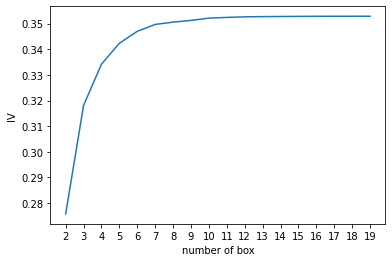

In [168]:
IV = []
axisx = []

while len(num_bins_) > 2:
    pvs = []
    # 获取 num_bins_两两之间的卡方检验的置信度（或卡方值）
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2:]
        # 0 返回 chi2 值，1 返回 p 值。
        pv = scipy.stats.chi2_contingency([x1,x2])[1]
        # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
        pvs.append(pv)

    # 通过 p 值进行处理。合并 p 值最大的两组
    i = pvs.index(max(pvs))
    num_bins_[i:i+2] = [(
                        num_bins_[i][0],
                        num_bins_[i+1][1],
                        num_bins_[i][2]+num_bins_[i+1][2],
                        num_bins_[i][3]+num_bins_[i+1][3])]

    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))
    
plt.figure()
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.xlabel("number of box")
plt.ylabel("IV")
plt.show()

# 最佳分箱数 5 6 

#### 3.3.5 用最佳分箱个数分箱，并验证分箱结果

In [169]:
def get_bin(num_bins_,n):
    while len(num_bins_) > n:
        pvs = []
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]

            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
            pvs.append(pv)

        i = pvs.index(max(pvs))
        num_bins_[i:i+2] = [(
                            num_bins_[i][0],
                            num_bins_[i+1][1],
                            num_bins_[i][2]+num_bins_[i+1][2],
                            num_bins_[i][3]+num_bins_[i+1][3])]
    return num_bins_
    


In [170]:
afterbins = get_bin(num_bins,6)
afterbins

[(21.0, 36.0, 14797, 24803),
 (36.0, 54.0, 39070, 51466),
 (54.0, 61.0, 15743, 12244),
 (61.0, 64.0, 6968, 3192),
 (64.0, 74.0, 13376, 4216),
 (74.0, 107.0, 7737, 1396)]

In [171]:
bins_df = get_woe(num_bins)
bins_df

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,36.0,14797,24803,39600,0.203069,0.626338,0.151467,0.254868,-0.520376
1,36.0,54.0,39070,51466,90536,0.464268,0.568459,0.399934,0.528849,-0.279402
2,54.0,61.0,15743,12244,27987,0.143517,0.437489,0.161151,0.125816,0.247524
3,61.0,64.0,6968,3192,10160,0.052100,0.314173,0.071327,0.032800,0.776845
4,64.0,74.0,13376,4216,17592,0.090212,0.239654,0.136922,0.043322,1.150740
5,74.0,107.0,7737,1396,9133,0.046834,0.152852,0.079199,0.014345,1.708567


#### 3.3.6 将选取最佳分箱个数的过程包装为函数

In [172]:
def graphforbestbin(DF, X, Y, n=5,q=20,graph=True):
    """
    自动最优分箱函数，基于卡方检验的分箱
    参数：
    DF: 需要输入的数据
    X: 需要分箱的列名
    Y: 分箱数据对应的标签 Y 列名
    n: 保留分箱个数
    q: 初始分箱的个数
    graph: 是否要画出IV图像
    区间为前开后闭 (]
    """
    DF = DF[[X,Y]].copy()

    DF["qcut"],bins = pd.qcut(DF[X], retbins=True, q=q,duplicates="drop")
    coount_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    coount_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],coount_y0,coount_y1)]

    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
                            num_bins[0][0],
                            num_bins[1][1],
                            num_bins[0][2]+num_bins[1][2],
                            num_bins[0][3]+num_bins[1][3])]
        continue

        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(
                                    num_bins[i-1][0],
                                    num_bins[i][1],
                                    num_bins[i-1][2]+num_bins[i][2],
                                    num_bins[i-1][3]+num_bins[i][3])]
                break
        else:
            break


    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0/df.count_0.sum()
        df["bad%"] = df.count_1/df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df

    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv

    IV = []
    axisx = []
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)

        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
                            num_bins[i][0],
                            num_bins[i+1][1],
                            num_bins[i][2]+num_bins[i+1][2],
                            num_bins[i][3]+num_bins[i+1][3])]

        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
    
    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()

    return bins_df

#### 3.3.7 对所有特征进行分箱选择

我们发现，不是所有的特征都可以使用这个分箱函数，比如说有的特征，像家人数量，就无法分出20组。于是我们将可以分箱的特征放出来单独分组

RevolvingUtilizationOfUnsecuredLines


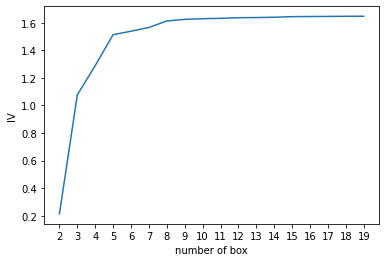

age


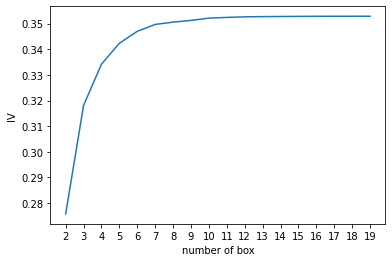

NumberOfTime30-59DaysPastDueNotWorse


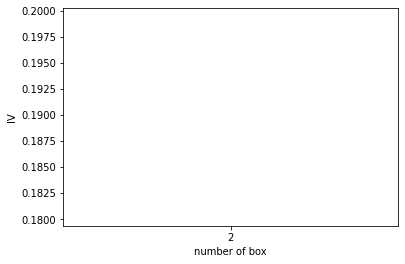

DebtRatio


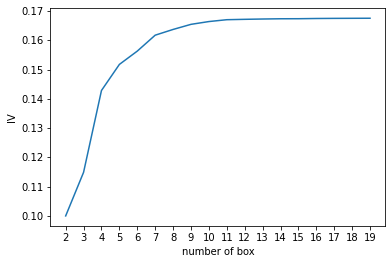

MonthlyIncome


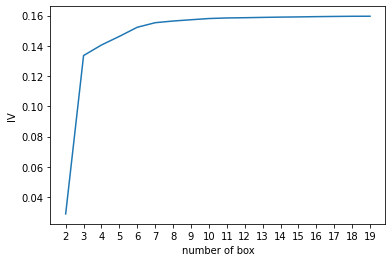

NumberOfOpenCreditLinesAndLoans


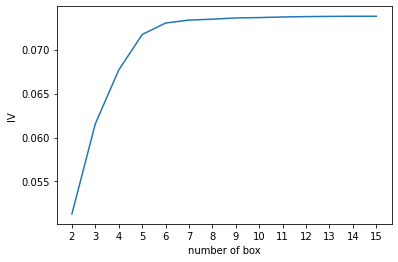

NumberOfTimes90DaysLate


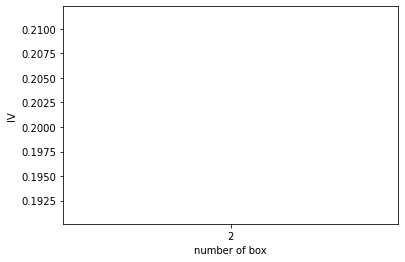

NumberRealEstateLoansOrLines


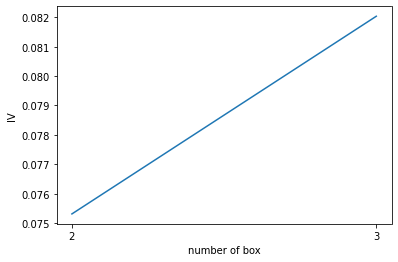

NumberOfTime60-89DaysPastDueNotWorse


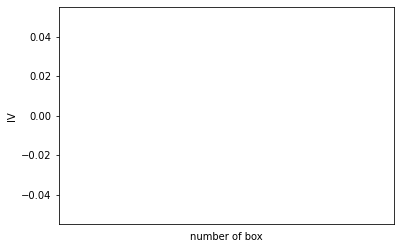

UnboundLocalError: local variable 'bins_df' referenced before assignment

In [173]:
model_data.columns

for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data,i,"SeriousDlqin2yrs",n=2,q=20)

In [174]:
auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":6,
                "age":5,
                "DebtRatio":4,
                "MonthlyIncome":3,
                "NumberOfOpenCreditLinesAndLoans":5}

#不能使用自动分箱的变量
hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,13]
            ,"NumberOfTimes90DaysLate":[0,1,2,17]
            ,"NumberRealEstateLoansOrLines":[0,1,2,4,54]
            ,"NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,8]
            ,"NumberOfDependents":[0,1,2,3]}
            
#保证区间覆盖使用 np.inf替换最大值，用-np.inf替换最小值
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

In [176]:
bins_of_col = {}

# 生成自动分箱的分箱区间和分箱后的 IV 值
for col in auto_col_bins:
    bins_df = graphforbestbin(model_data,col
                            ,"SeriousDlqin2yrs"
                            ,n=auto_col_bins[col]
                            #使用字典的性质来取出每个特征所对应的箱的数量
                            ,q=20
                            ,graph=False)
    bins_list = sorted(set(bins_df["min"]).union(bins_df["max"]))
    #保证区间覆盖使用 np.inf 替换最大值 -np.inf 替换最小值
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list

    #合并手动分箱数据
    bins_of_col.update(hand_bins)

    bins_of_col

### 3.4 计算各箱的WOE并映射到数据中
我们现在已经有了我们的箱子，接下来我们要做的是计算各箱的WOE，并且把WOE替换到我们的原始数据model_data中，因为我们将使用WOE覆盖后的数据来建模，我们希望获取的是”各个箱”的分类结果，即评分卡上各个评分项目的分类结果

- `unstack()` :将树状结构变成表状结构

In [177]:
data = model_data.copy()

#函数pd.cut，可以根据已知的分箱间隔把数据分箱
#参数为 pd.cut(数据，以列表表示的分箱间隔)
data = data[["age","SeriousDlqin2yrs"]].copy()

data["cut"] = pd.cut(data["age"],[-np.inf, 48.49986200790144, 58.757170160044694, 64.0,74.0, np.inf])
data


,age,SeriousDlqin2yrs,cut
0,53,0,"(48.5, 58.757]"
1,63,0,"(58.757, 64.0]"
2,39,1,"(-inf, 48.5]"
3,73,0,"(64.0, 74.0]"
4,53,1,"(48.5, 58.757]"
...,...,...,...
195003,32,1,"(-inf, 48.5]"
195004,50,1,"(48.5, 58.757]"
195005,46,1,"(-inf, 48.5]"
195006,64,0,"(58.757, 64.0]"


In [178]:
#将数据按分箱结果聚合，并取出其中的标签值
data.groupby("cut")["SeriousDlqin2yrs"].value_counts()


cut             SeriousDlqin2yrs
(-inf, 48.5]    1                   59178
                0                   39558
(48.5, 58.757]  1                   24537
                0                   23469
(58.757, 64.0]  0                   13551
                1                    7990
(64.0, 74.0]    0                   13376
                1                    4216
(74.0, inf]     0                    7737
                1                    1396
Name: SeriousDlqin2yrs, dtype: int64

In [179]:
#使用unstack()来将树状结构变成表状结构
data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()


SeriousDlqin2yrs,0,1
cut,,
"(-inf, 48.5]",39558,59178
"(48.5, 58.757]",23469,24537
"(58.757, 64.0]",13551,7990
"(64.0, 74.0]",13376,4216
"(74.0, inf]",7737,1396


In [180]:
bins_df = data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()


In [181]:
bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))

把以上过程包装成函数：

In [182]:
def get_woe(df,col,y,bins):
    df = df[[col,y]].copy()
    df["cut"] = pd.cut(df[col],bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"] =np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe


In [183]:
    
#将所有特征的WOE存储到字典当中
woeall = {}
for col in bins_of_col:
    woeall[col] = get_woe(model_data,col,"SeriousDlqin2yrs",bins_of_col[col])
    
woeall


{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.0991]     2.203733
 (0.0991, 0.298]    0.666832
 (0.298, 0.465]    -0.128195
 (0.465, 0.982]    -1.073587
 (0.982, 1.0]      -0.478503
 (1.0, inf]        -2.032646
 dtype: float64,
 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.354302
 (0.0, 1.0]    -0.875309
 (1.0, 2.0]    -1.378052
 (2.0, inf]    -1.547642
 dtype: float64,
 'NumberOfTimes90DaysLate': cut
 (-inf, 0.0]    0.234852
 (0.0, 1.0]    -1.752319
 (1.0, 2.0]    -2.260545
 (2.0, inf]    -2.403095
 dtype: float64,
 'NumberRealEstateLoansOrLines': cut
 (-inf, 0.0]   -0.393404
 (0.0, 1.0]     0.195567
 (1.0, 2.0]     0.615183
 (2.0, 4.0]     0.381837
 (4.0, inf]    -0.277056
 dtype: float64,
 'NumberOfTime60-89DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.124246
 (0.0, 1.0]    -1.380260
 (1.0, 2.0]    -1.780520
 (2.0, inf]    -1.825556
 dtype: float64,
 'NumberOfDependents': cut
 (-inf, 0.0]    0.659642
 (0.0, 1.0]    -0.515175
 (1.0, 2.0]    -0.531078
 (2.0, inf

接下来，把所有WOE映射到原始数据中：

In [184]:
#不希望覆盖掉原本的数据，创建一个新的DataFrame，索引和原始数据model_data一模一样
model_woe = pd.DataFrame(index=model_data.index)
model_woe.head()


""
0
1
2
3
4


In [185]:
#将原数据分箱后，按箱的结果把WOE结构用map函数映射到数据中

model_woe["age"] = pd.cut(model_data["age"],bins_of_col["age"]).map(woeall["age"])
model_woe.head()

,age
0,-0.279402
1,1.006390
2,-0.279402
3,1.006390
4,-0.279402


In [186]:
#对所有特征操作可以写成：
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col],bins_of_col[col]).map(woeall[col])
    
model_woe.head()

,age,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans
0,-0.279402,2.203733,0.354302,0.234852,-0.393404,0.124246,0.659642,0.073915,-0.234495,-0.051721
1,1.006390,0.666832,0.354302,0.234852,-0.393404,0.124246,0.659642,0.073915,-0.234495,-0.051721
2,-0.279402,-2.032646,-0.875309,-1.752319,-0.393404,-1.780520,-0.475474,-0.313795,-0.234495,-0.051721
3,1.006390,2.203733,0.354302,0.234852,0.615183,0.124246,0.659642,-0.313795,-0.234495,0.123005
4,-0.279402,-1.073587,0.354302,0.234852,0.615183,0.124246,-0.515175,-0.313795,0.233130,0.123005


In [187]:
#将标签补充到数据中
model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]
#这就是我们的建模数据了
model_woe.head()

,age,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,SeriousDlqin2yrs
0,-0.279402,2.203733,0.354302,0.234852,-0.393404,0.124246,0.659642,0.073915,-0.234495,-0.051721,0
1,1.006390,0.666832,0.354302,0.234852,-0.393404,0.124246,0.659642,0.073915,-0.234495,-0.051721,0
2,-0.279402,-2.032646,-0.875309,-1.752319,-0.393404,-1.780520,-0.475474,-0.313795,-0.234495,-0.051721,1
3,1.006390,2.203733,0.354302,0.234852,0.615183,0.124246,0.659642,-0.313795,-0.234495,0.123005,0
4,-0.279402,-1.073587,0.354302,0.234852,0.615183,0.124246,-0.515175,-0.313795,0.233130,0.123005,1


## 3.5 建模与模型验证

In [191]:
#处理测试集
vali_woe = pd.DataFrame(index=vali_data.index)
for col in bins_of_col:
    vali_woe[col] = pd.cut(vali_data[col],bins_of_col[col]).map(woeall[col])
vali_woe["SeriousDlqin2yrs"] = vali_data["SeriousDlqin2yrs"]
vali_woe.head()

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,SeriousDlqin2yrs
0,2.203733,0.354302,0.234852,-0.393404,0.124246,0.659642,0.247524,1.505012,-0.234495,-0.051721,0
1,-1.073587,0.354302,0.234852,0.615183,0.124246,-0.475474,-0.279402,0.073915,0.233130,0.123005,1
2,2.203733,0.354302,0.234852,-0.393404,0.124246,0.659642,1.006390,0.073915,0.233130,-0.051721,0
3,2.203733,0.354302,0.234852,0.195567,0.124246,0.659642,-0.279402,0.073915,-0.234495,0.123005,0
4,-1.073587,0.354302,0.234852,-0.393404,0.124246,-0.515175,-0.279402,-0.313795,-0.234495,0.123005,1


In [192]:
vali_X = vali_woe.iloc[:,:-1]
vali_y = vali_woe.iloc[:,-1]

In [193]:
X = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]

from sklearn.linear_model import LogisticRegression as LR

lr = LR().fit(X,y)  # 默认逻辑回归的参数
lr.score(vali_X,vali_y)

# 结果很一般

c:\Users\HP\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


0.7700057432755815

c:\Users\HP\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\HP\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\HP\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\HP\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names shoul

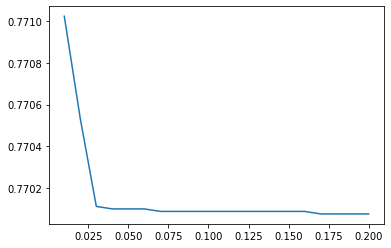

In [194]:
# 返回的结果一般，我们可以试着使用C和max_iter的学习曲线把逻辑回归的效果调上去
c_1 = np.linspace(0.01,1,20)
c_2 = np.linspace(0.01,0.2,20)

score = []
for i in c_2:
    lr = LR(solver='liblinear',C=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
    
plt.figure()
plt.plot(c_2,score)
plt.show()


In [195]:

lr.n_iter_
# 最大迭代次数为5次

array([5], dtype=int32)

c:\Users\HP\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\HP\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\HP\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\HP\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\HP\Python\Python310\lib\site-packages\sklea

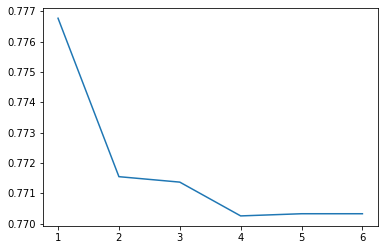

In [196]:

score = []
for i in [1,2,3,4,5,6]:
    lr = LR(solver='liblinear',C=0.025,max_iter=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))

plt.figure()
plt.plot([1,2,3,4,5,6],score)
plt.show()

# 迭代次数越大 模型效果越不咋滴？？？？

In [197]:
score

[0.7767660572413133,
 0.7715492485881115,
 0.7713697712261893,
 0.7702570115822724,
 0.7703288025270413,
 0.7703288025270413]

In [198]:
!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple --trusted-host pypi.tuna.tsinghua.edu.cn scikit-plot

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


c:\Users\HP\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

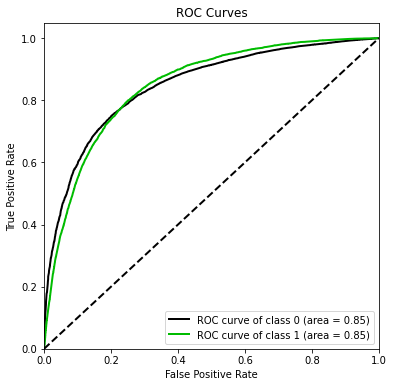

In [199]:
#————————————————绘制ROC曲线————————————————
import scikitplot as skplt

vali_proba_df = pd.DataFrame(lr.predict_proba(vali_X))
skplt.metrics.plot_roc(vali_y, vali_proba_df,
                        plot_micro=False,figsize=(6,6),
                        plot_macro=False)

## 3.6 制作评分卡
建模完毕，我们使用准确率和ROC曲线验证了模型的预测能力。接下来就是要讲逻辑回归转换为标准评分卡了。评分卡中的分数，由以下公式计算：
$$Score = A-B*\log{odds}$$

其中A与B是常数，A叫做“补偿”，B叫做“刻度”， 代表了一个人违约的可能性。其实逻辑回归的结果取对数几率形式会得到 ，即我们的参数*特征矩阵，所以 其实就是我们的参数。两个常数可以通过两个假设的分值带入公式求出，这两个假设分别是：
1. 某个特定的违约概率下的预期分值
2. 指定的违约概率翻倍的分数（PDO）

In [202]:
# 特定分数为600，PDO=20
B = 20/np.log(2)
A = 600 + B*np.log(1/60)
B,A

(28.85390081777927, 481.8621880878296)

In [203]:
base_score = A - B*lr.intercept_
base_score

score_age = woeall["age"] * (-B*lr.coef_[0][0])
score_age

cut
(-inf, 36.0]    -4.205542
(36.0, 54.0]    -2.258056
(54.0, 61.0]     2.000425
(61.0, 74.0]     8.133379
(74.0, inf]     13.808194
dtype: float64

In [204]:
file ='./DATASETS/chap5/ScoreData.csv'
#open是用来打开文件的python命令，第一个参数是文件的路径+文件名，如果你的文件是放在根目录下，则你只需要文件名就好
#第二个参数是打开文件后的用途，"w"表示用于写入，通常使用的是"r"，表示打开来阅读
#首先写入基准分数
#之后使用循环，每次生成一组score_age类似的分档和分数，不断写入文件之中

with open(file,"w") as fdata:
    fdata.write("base_score,{}\n".format(base_score))

for i,col in enumerate(X.columns):
    score = woeall[col] * (-B*lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file,header=True,mode="a")